solving traj


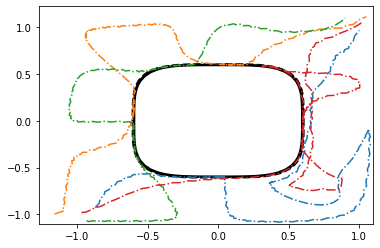

In [1]:
import sys
sys.path.append('../../')
import numpy as np

from erg_traj_opt_lib.motion_model import SingleIntegrator
from erg_traj_opt_lib.target_distribution import TargetDistribution
from erg_traj_opt_lib.fourier_utils import BasisFunc, get_phik
from erg_traj_opt_lib.erg_traj_opt import erg_traj_opt
from erg_traj_opt_lib.obstacle import Obstacle

import matplotlib.pyplot as plt

if __name__=='__main__':


    robot_model     = SingleIntegrator()
    n_states        = robot_model.n
    N_robots        = robot_model.N
    m_ctrls         = robot_model.m

    target_distr    = TargetDistribution()
    basis           = BasisFunc(n_basis=[8,8])

    N = 100 
    tf = 10.0
    dt = 0.1
    time_horizon = 100
    np.random.seed(10)
    args = {
        'x0' : -np.ones((N_robots, n_states))+np.random.normal(0., 0.1, size=(N_robots, n_states)),
        'xf' : np.ones((N_robots, n_states))+np.random.normal(0., 0.1, size=(N_robots, n_states)),
        'phik' : get_phik(target_distr.evals, basis),
        'wrksp_bnds' : np.array([[-1.1,1.1],[-1.1,1.1]]),
        'alpha' : 0.2
    }

    obs = [
        Obstacle(pos=np.array([0.,0.]),     half_dims=np.array([0.5,0.5]), th=0.),
    ]


    traj_opt = MAErgodicTrajectoryOpt(robot_model, obstacles=obs, basis=basis, time_horizon=200, args=args)

    X, Y = np.meshgrid(*[np.linspace(wks[0],wks[1]) for wks in args['wrksp_bnds']])
    pnts = np.vstack([X.ravel(), Y.ravel()]).T

    _mixed_vals = -np.inf * np.ones_like(X)
    for ob in obs:
        _vals = np.array([ob.distance(pnt) for pnt in pnts]).reshape(X.shape)
        _mixed_vals = np.maximum(_vals, _mixed_vals)
    

    # plt.figure(figsize=(3,2))

    print('solving traj')
    (x, u), isConv = traj_opt.get_trajectory(args=args)

    plt.contour(X, Y, _mixed_vals, levels=[-0.01,0.,0.01], linewidths=2, colors='k')
    for i in range(robot_model.N):
        plt.plot(x[:,i, 0], x[:,i, 1], linestyle='dashdot')#, c='m', alpha=alpha)
    # plt.tight_layout()
    # plt.axis('equal')
    

    plt.show()